In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
house = pd.read_csv('Housing (1).csv')

In [4]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
house.shape

(545, 13)

C:\Users\USER\AppData\Local\Temp\ipykernel_6492\2485876923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house.corr()
C:\Users\USER\AppData\Local\Temp\ipykernel_6492\2485876923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house.corr().round(2))


<Axes: >

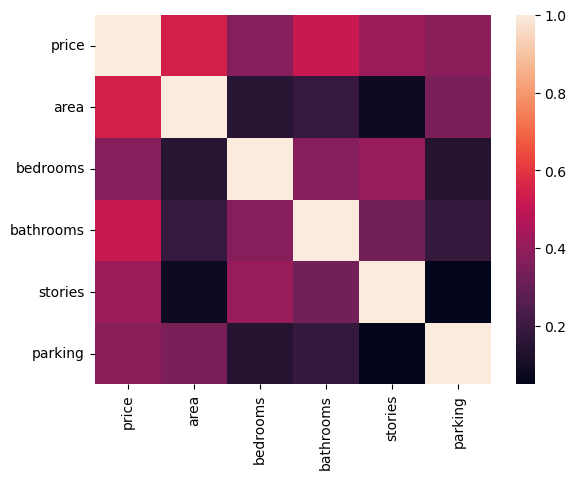

In [6]:
house.corr()
sns.heatmap(house.corr().round(2))

<Axes: >

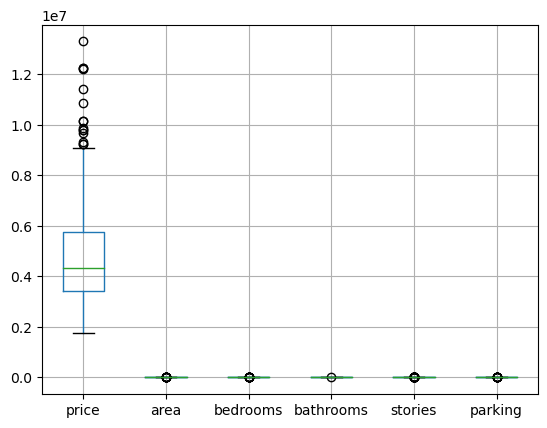

In [9]:
house.boxplot() #outliersforallcolumns

<Axes: ylabel='price'>

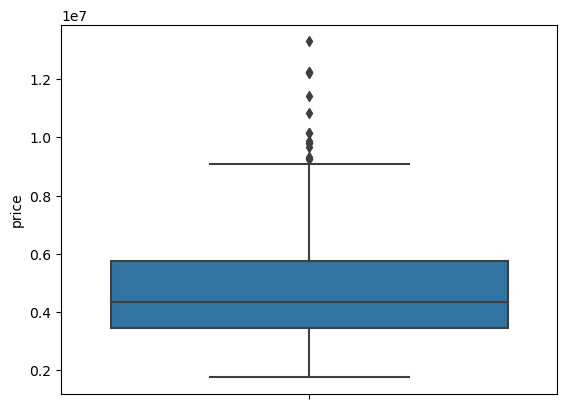

In [10]:
sns.boxplot(y='price',data=house) #outliersfor'price'

In [13]:
house2 = pd.get_dummies(house, drop_first=True)  #changingcolumnswithwordstonumbers

In [14]:
house2.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [15]:
house2.shape #newdataframeinfo

(545, 14)

In [17]:
x = house2.drop('price', axis = 1)
y = house2['price']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
scaler = MinMaxScaler()

In [20]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
x_train

array([[0.12419939, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.15065441, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08382066, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.27248677, 0.4       , 0.5       , ..., 1.        , 0.        ,
        1.        ],
       [0.12280702, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33166249, 0.4       , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [22]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = regressor.predict(x_test)


In [24]:
r2_score(y_test, y_pred)

0.6611214250980104

In [28]:
math.sqrt(mean_squared_error(y_test, y_pred)) #squarerootoftheRMSE

988172.4399236252

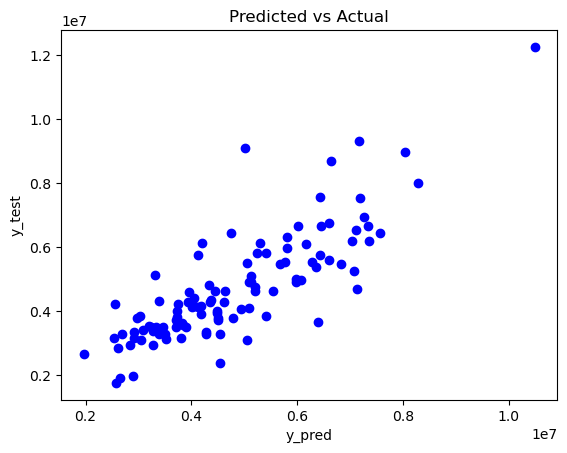

In [29]:
#Newlybuildmodel'sresidualplot

plt.scatter(y_pred, y_test, color= 'blue')
plt.title('Predicted vs Actual')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()